In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline  # visualizzation will come in prope ship
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import dataset
Housing = pd.read_csv('/content/USA_Housing.csv')
Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
#Finding the unique values in the columns
for i in Housing.columns:
  print("*******************************************************" ,i,
        "**********************************************************")
  print()
  print(set(Housing[i].tolist()))
  print()


******************************************************* Avg. Area Income **********************************************************

{65543.33854, 65550.80328, 65554.84252, 65561.45584, 65566.35691, 65567.85918, 65573.46111, 65579.37802, 65580.05597, 65594.06739, 65606.35861, 65608.60771, 65614.78487, 65627.05111, 65629.88097, 65632.92598, 65641.80717, 65643.86248, 65659.58698, 65669.98453, 65672.20442, 65673.75136, 65674.59699, 65687.10668, 65692.6182, 65694.05127, 65697.82067, 98468.25364, 65706.75564, 65718.30197, 65729.22233, 65736.34642, 65739.68602, 65741.39764, 65745.73181, 65801.23308, 65803.60065, 65817.20028, 65825.82895, 65827.33514, 65827.67224, 65837.11694, 65841.30879, 65846.40694, 65846.17104, 65851.26289, 65855.86324, 65864.97112, 65866.45257, 65873.93941, 65885.13576, 65893.44773, 65896.42207, 65897.66157, 65901.47709, 65901.03035, 65903.25066, 65904.80993, 65907.94668, 65908.73975, 65913.86161, 65925.8538, 65935.61261, 65935.57561, 65939.88495, 65948.91814, 65950.3470

In [7]:
# TO find the information about the dataset
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


## Data Preprocessing
##### 1) Handling Missing Data - mandatory (because algorith will not work with missing data )
##### 2) Encoding (Char to Num) - only rrequired varibale when varibale is significant (understanding and by the help of p-value)
##### 3) Outlier Treatment - Linear Regression (Its mandatory)
##### 4) Feature Scaling - to scale independent variable only(also, note that if you use gradient descent/knn/svm etc then you have to use feature scaling techniques)




In [9]:
# part 1 : Missing value treatment
Housing.isnull().sum()

,0
Avg. Area Income,10
Avg. Area House Age,0
Avg. Area Number of Rooms,5
Avg. Area Number of Bedrooms,6
Area Population,0
Price,0
Address,0


In [10]:
Housing.isnull().sum()/len(Housing)*100

,0
Avg. Area Income,0.20
Avg. Area House Age,0.00
Avg. Area Number of Rooms,0.10
Avg. Area Number of Bedrooms,0.12
Area Population,0.00
Price,0.00
Address,0.00


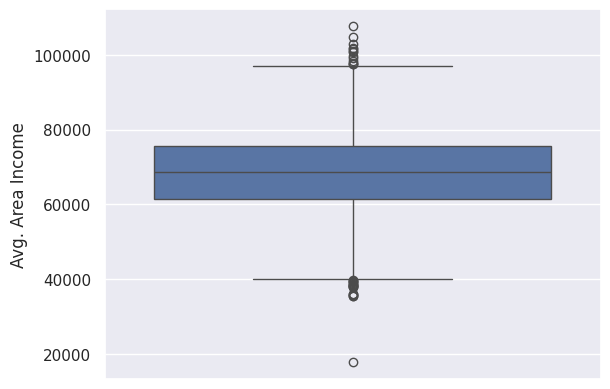

In [12]:
sns.boxplot(y = 'Avg. Area Income', data=Housing)
plt.show()

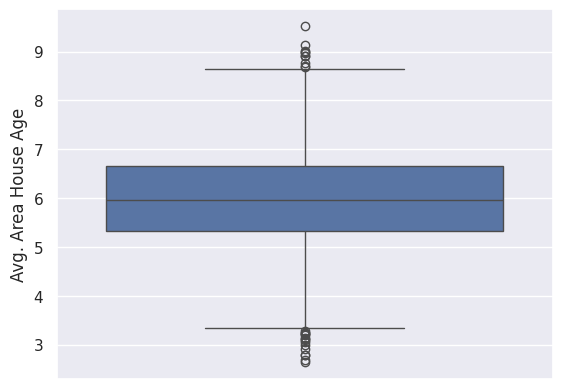

In [13]:
 sns.boxplot(y = 'Avg. Area House Age', data=Housing)
plt.show()

In [17]:
Housing['Avg. Area Income'] = Housing['Avg. Area Income'].fillna(Housing['Avg. Area Income'].median())

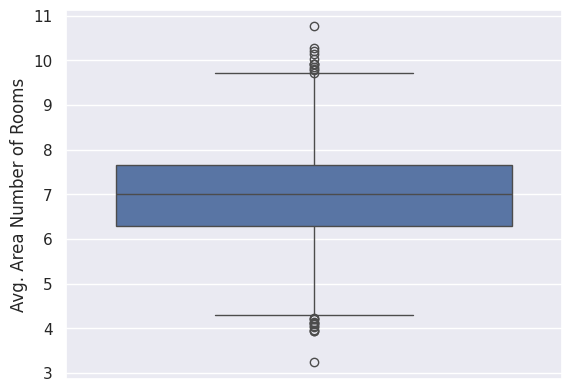

In [14]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data=Housing)
plt.show()

In [18]:
Housing['Avg. Area Number of Rooms'] = Housing['Avg. Area Number of Rooms'].fillna(Housing['Avg. Area Number of Rooms'].median())

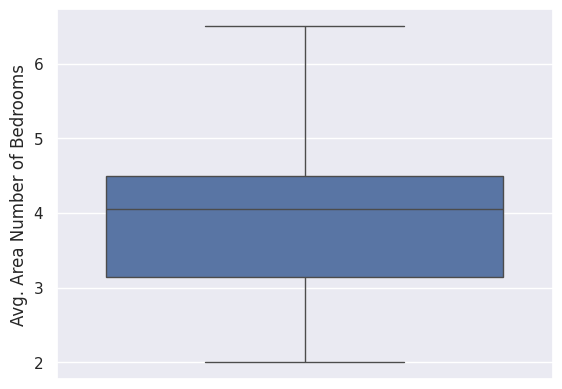

In [15]:
sns.boxplot(y = 'Avg. Area Number of Bedrooms', data=Housing)
plt.show()

In [19]:
Housing['Avg. Area Number of Bedrooms'] = Housing['Avg. Area Number of Bedrooms'].fillna(Housing['Avg. Area Number of Bedrooms'].mean())

In [21]:
Housing.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [22]:
Housing .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
# Part 1: Missing value treatment - completed
# part 2: Encoding : (Address columns is not required as area information already  given)- hence we have to drop it
# part 2: completed


In [23]:
Housing = Housing.iloc[:,0:-1]
Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


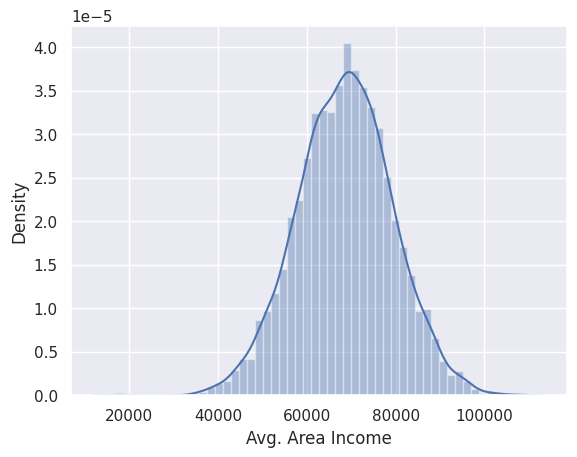

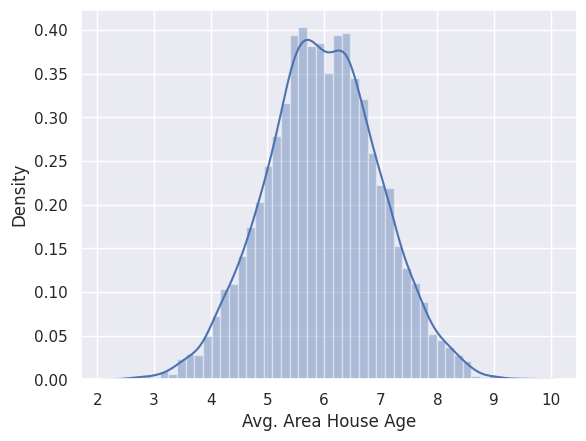

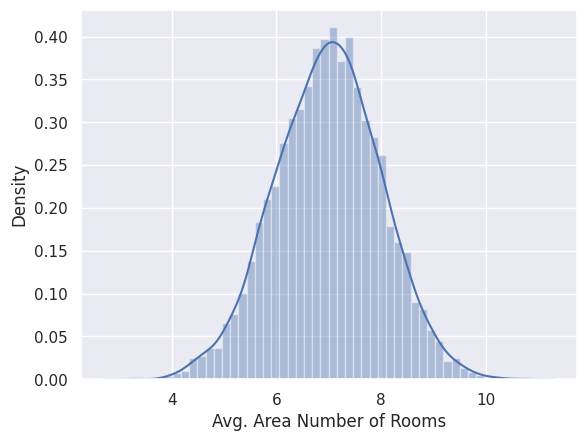

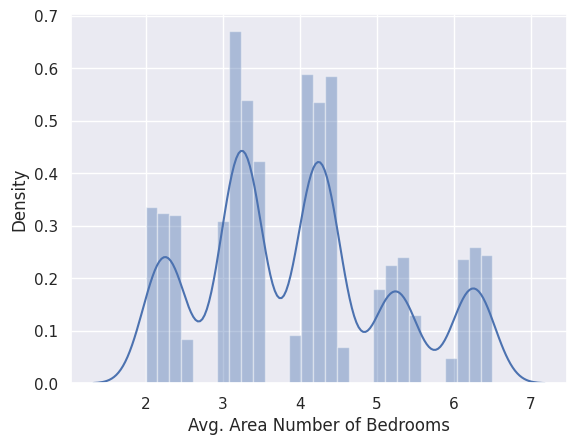

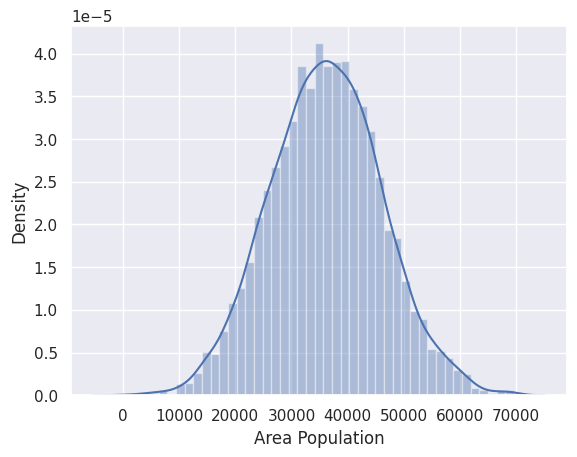

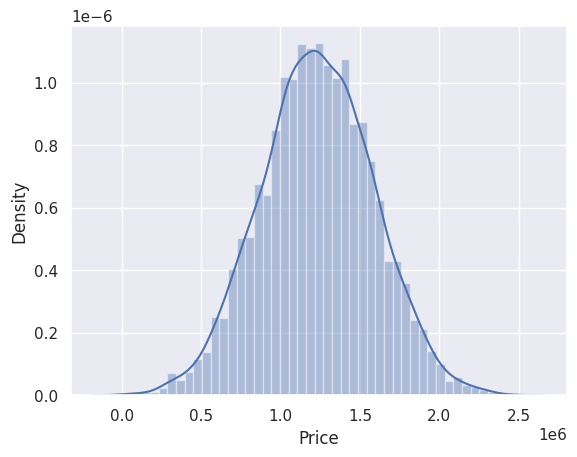

In [24]:
 # part 3 - Handling Outlier
 def distplots(col):
    sns.distplot(Housing[col])
    plt.show()

for i in list(Housing.columns)[0:]:
    distplots(i)

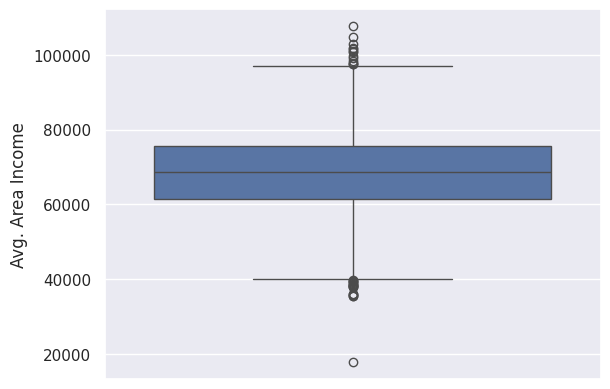

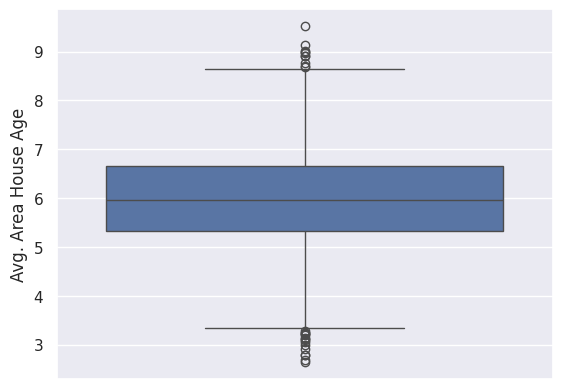

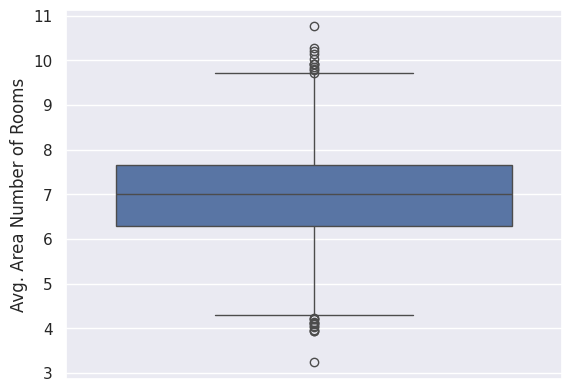

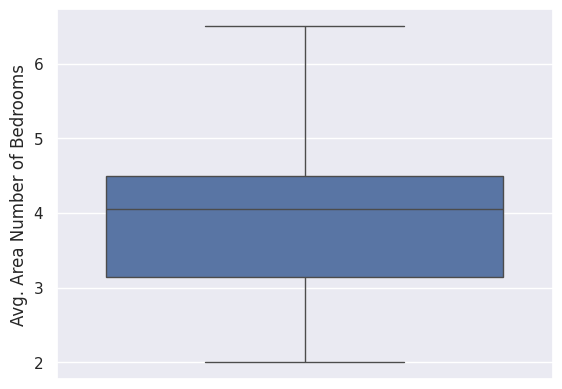

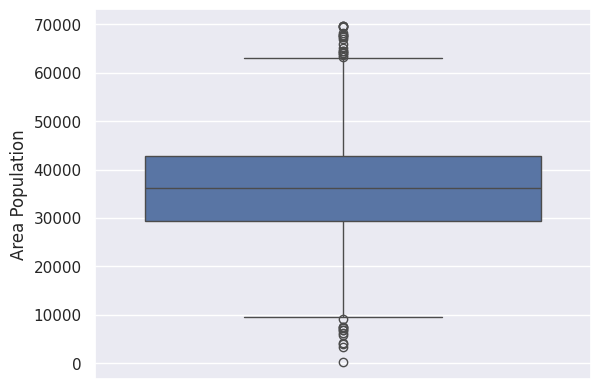

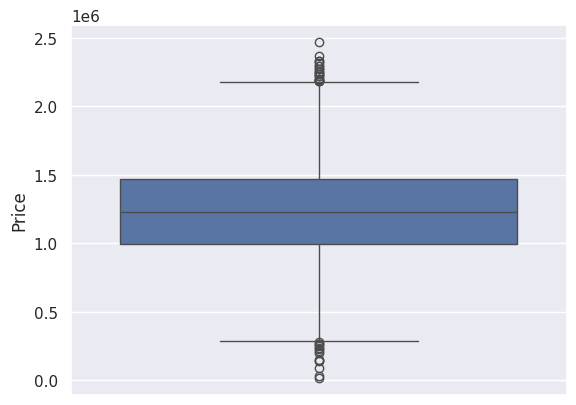

In [25]:
def boxplots(col):
    sns.boxplot(Housing[col])
    plt.show()

for i in list(Housing.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)


In [26]:
Housing.dtypes

,0
Avg. Area Income,float64
Avg. Area House Age,float64
Avg. Area Number of Rooms,float64
Avg. Area Number of Bedrooms,float64
Area Population,float64
Price,float64


In [27]:
# we have to handle outlier for the listed variables
# Avg. Area Income , Avg. Area House Age , Avg. Area Number of Rooms and Area Population

In [28]:
Q1 = Housing.quantile(0.25)
Q3 = Housing.quantile(0.75)
IQR = Q3 - Q1

Pos_Outlier = Q3 + 1.5 * IQR
Neg_Outlier = Q1 - 1.5 * IQR

print("**********Q1***********")
print(Q1)
print("**********Q3***********")
print(Q3)
print("**********IQR***********")
print(IQR)
print("**********Positive Outlier***********")
print(Pos_Outlier)
print("**********Negative Outlier***********")
print(Neg_Outlier)
print()

**********Q1***********
Avg. Area Income                 61485.150192
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299692
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928700
Price                           997577.135075
Name: 0.25, dtype: float64
**********Q3***********
Avg. Area Income                7.576652e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665281e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
**********IQR***********
Avg. Area Income                 14281.368910
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.365589
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362070
Price                           473633.069425
dtype: float64
**********Positive Outlier**********

In [29]:
# Avg. Area Income , Avg. Area House Age , Avg. Area Number of Rooms and Area Population

In [30]:
income_q1 = Housing['Avg. Area Income'].quantile(0.25)
income_q3 = Housing['Avg. Area Income'].quantile(0.75)
income_iqr =income_q3 - income_q1
lower_limit = income_q1 - 1.5*income_iqr
upper_limit = income_q3  + 1.5 * income_iqr

In [31]:
Housing['Avg. Area Income'] = np.where(Housing['Avg. Area Income'] > upper_limit, upper_limit,
                                      np.where(Housing['Avg. Area Income'] < lower_limit,
                                              lower_limit, Housing['Avg. Area Income']))

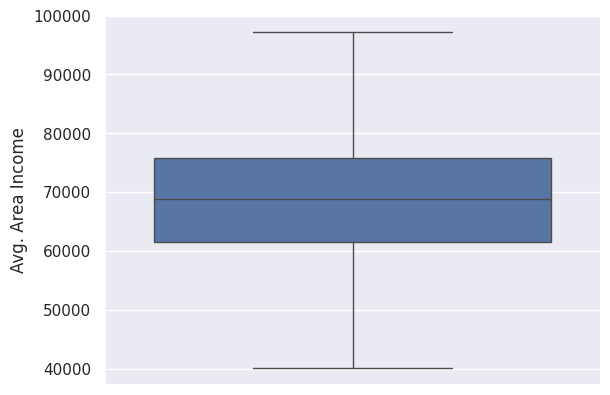

In [32]:
sns.boxplot(y ='Avg. Area Income', data=Housing)
plt.show()

In [33]:
income_q1 = Housing['Avg. Area House Age'].quantile(0.25)
income_q3 = Housing['Avg. Area House Age'].quantile(0.75)
income_iqr =income_q3 - income_q1
lower_limit = income_q1 - 1.5*income_iqr
upper_limit = income_q3  + 1.5 * income_iqr

In [34]:
Housing['Avg. Area House Age'] = np.where(Housing['Avg. Area House Age'] > upper_limit, upper_limit,
                                      np.where(Housing['Avg. Area House Age'] < lower_limit,
                                              lower_limit, Housing['Avg. Area House Age']))

In [35]:
income_q1 = Housing['Avg. Area Number of Rooms'].quantile(0.25)
income_q3 = Housing['Avg. Area Number of Rooms'].quantile(0.75)
income_iqr =income_q3 - income_q1
lower_limit = income_q1 - 1.5*income_iqr
upper_limit = income_q3  + 1.5 * income_iqr


In [36]:
Housing['Avg. Area Number of Rooms'] = np.where(Housing['Avg. Area Number of Rooms'] > upper_limit, upper_limit,
                                      np.where(Housing['Avg. Area Number of Rooms'] < lower_limit,
                                              lower_limit, Housing['Avg. Area Number of Rooms']))

In [37]:
income_q1 = Housing['Area Population'].quantile(0.25)
income_q3 = Housing['Area Population'].quantile(0.75)
income_iqr =income_q3 - income_q1
lower_limit = income_q1 - 1.5*income_iqr
upper_limit = income_q3  + 1.5 * income_iqr

In [38]:
Housing['Area Population'] = np.where(Housing['Area Population'] > upper_limit, upper_limit,
                                      np.where(Housing['Area Population'] < lower_limit,
                                              lower_limit, Housing['Area Population']))

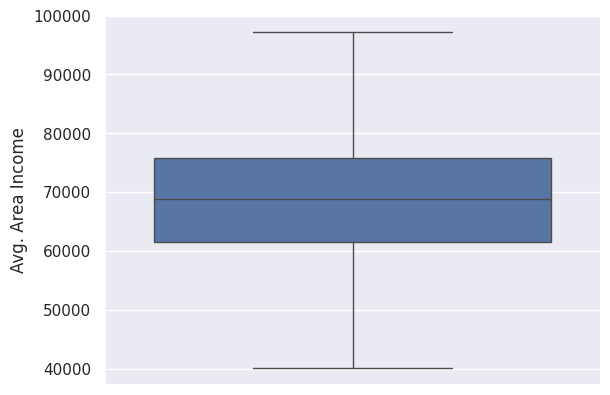

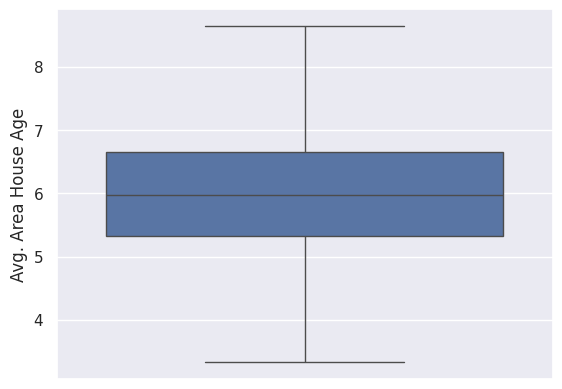

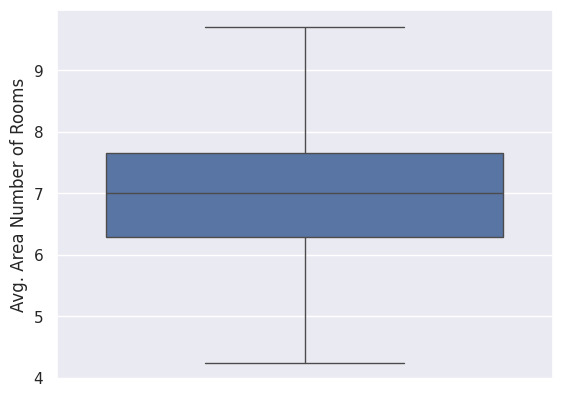

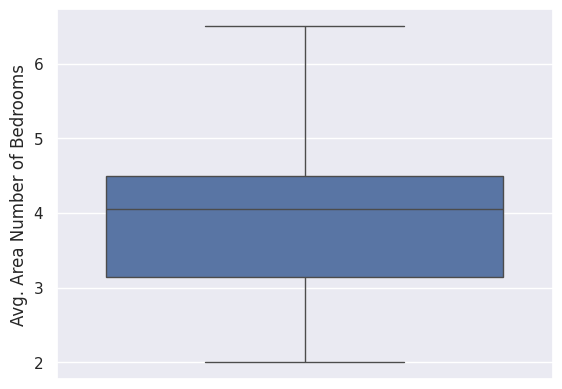

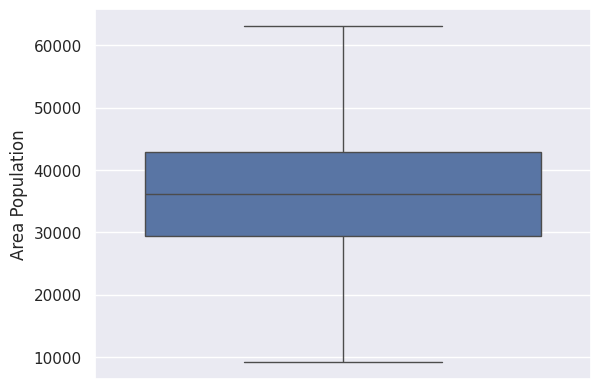

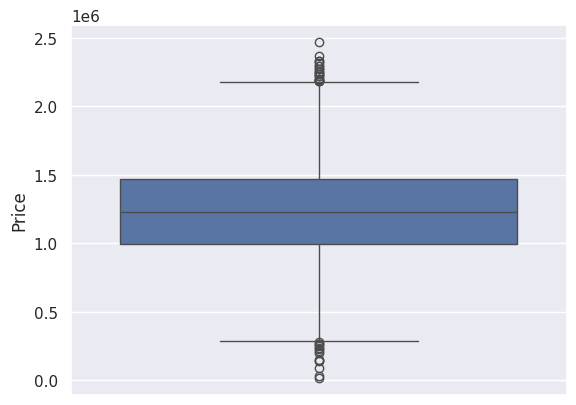

In [39]:
def boxplots(col):
    sns.boxplot(Housing[col])
    plt.show()

for i in list(Housing.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [40]:
Housing.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915


In [41]:
# Part 1 : Missing value treatement - Completed
# Part 2 - Encoding Treatement - completed
# Part 3 - Outlier Treatment - completed
# Part 4 - Feature Scaling - first we have to split the data into indepednet and dependent varialbe
x = Housing.iloc[:,0:-1] # Independent variable
y = Housing.iloc[:,-1] # Dependent variable

In [42]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [43]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087648,-1.325622
1,1.008309,0.025747,-0.256381,-0.722966,0.407049
2,-0.690457,-0.113082,1.523179,0.930687,0.073326
3,-0.495800,1.226822,-1.398967,-0.585161,-0.187484
4,-0.813869,-0.949376,0.850726,0.201134,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423039,-1.350917
4996,0.936679,1.035210,-0.410236,0.030905,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501155,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181977,0.655755


In [45]:
pd.DataFrame(sc_x).describe()

,0,1,2,3,4
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-4.160228e-16,-1.573852e-16,-2.913225e-16,-3.836931e-17,3.439027e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.697774e+00,-2.683155e+00,-2.732629e+00,-1.606535e+00,-2.732030e+00
25%,-6.717228e-01,-6.639070e-01,-6.869427e-01,-6.824351e-01,-6.850199e-01
50%,1.987953e-02,-7.155075e-03,1.537949e-02,5.522369e-02,4.090352e-03
75%,6.789778e-01,6.822584e-01,6.768483e-01,4.118939e-01,6.796532e-01
max,2.705029e+00,2.701506e+00,2.722535e+00,2.041228e+00,2.726663e+00


In [46]:
# It's multiple linear regression, hence we have to check "Multicollinearity"
variable = sc_x
variable.shape

(5000, 5)

In [47]:
print(variable.shape[0])
print()
print(variable.shape[1])

5000

5


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [50]:
vif

,variance_inflation_factor,Features
0,1.001066,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274838,Avg. Area Number of Rooms
3,1.275700,Avg. Area Number of Bedrooms
4,1.001142,Area Population
